# Exploratory Data Analysis on Lending Club's loan data set

### What is Lending Club
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans. Lending Club is the world's largest peer-to-peer lending platform. The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015.

Lending Club enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee. For more information click [here](https://en.wikipedia.org/wiki/Lending_Club)

The dataset has been downloaded from [LendingClub](https://www.lendingclub.com/info/download-data.action) website. From the DataSet we are going to analyze how the 2017 Q2 lending club approved and rejected loans. As a Peer to Peer lending company Lending Club receives many applications, however not all getting approved due to poor risk score and other factors which makes loan delinquency. As part of this analysis, I am going to explore one-quarter data set to find insights on the various loans.

Analytical Questions:
 1. What are the different purposes LendingClub provides loans to its customers? and which loan type yields high-interest rate?
 2. What is the reason behind loan application denial or rejection of the loan?
 3. How is Lending Club's overall 2017 Q2 performance ?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
#setting the max_columns options so that all the columns will be visible while displaying data frame.
pd.set_option('display.max_columns',150)
import warnings
warnings.filterwarnings('ignore')

## Loading and Understanding the Data.

In [3]:
# Loading approved loans data set for 2017 Q2 from S3.
df_loanstats_2017_q2 = pd.read_csv('https://s3.amazonaws.com/stkaggle/lending_club/LoanStats_securev1_2017Q2_Full.csv')
# Loading reject loans data set for 2017 Q2 from S3.
df_rejectedstats_2017_q2 = pd.read_csv('https://s3.amazonaws.com/stkaggle/lending_club/RejectStats_2017Q2.csv')

## Data Set Description

The Loan Status CSV (LoanStats_securev1_2017Q2.csv) contains 143 columns however as part of this analysis we will use only below columns. The columns which are going to be used in the analysis has been described below. 

Similarly the rejected loan CSV (RejectStats_2017Q2.csv) has total 9 columns, the columns which are used on analysis has been described below:

Column descriptions for df_loanstats_2017_q2:

    1. funded_amnt : The total amount committed to that loan at that point in time.
    2. loan_amnt :	The listed amount of the loan applied for by the borrower. If at some point in time, the credit  department reduces the loan amount, then it will be reflected in this value.
    3. int_rate	: Interest Rate on the loan.
    4. addr_state :	The state provided by the borrower in the loan application.
    5. total_acc : The total number of credit lines currently in the borrower's credit file.
    6. open_acc	The number of open credit lines in the borrower's credit file.
    7. purpose : A category provided by the borrower for the loan request.
    8. tot_cur_bal : Total current balance of all accounts.
    9. fico_range_low : The lower boundary range the borrower’s FICO at loan origination belongs to.
    10: fico_range_high : The upper boundary range the borrower’s FICO at loan origination belongs to.
    11: pub_rec_bankruptcies : Number of public record bankruptcies.
    12: issue_d : The month which the loan was funded.

Column descriptions for df_rejectedstats_2017_q2:
    1. Risk_Score :	For applications prior to November 5, 2013 the risk score is the borrower's FICO score. For applications after November 5, 2013 the risk score is the borrower's Vantage score.
    2. Debt-To-Income Ratio : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
    3. Employment Length :	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

# Summary Statistics

In [4]:
print('Total records in 2017 Q2 funded loan dataset : {} \n'.format(len(df_loanstats_2017_q2)))
df_loanstats_2017_q2.info()
print('\n')
df_loanstats_2017_q2.head()

Total records in 2017 Q2 funded loan dataset : 105453 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105453 entries, 0 to 105452
Columns: 143 entries, id to hardship_last_payment_amount
dtypes: float64(109), object(34)
memory usage: 115.0+ MB




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,112158057,NaN,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,Project Lead,10+ years,MORTGAGE,113000.0,Source Verified,Jun-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,206xx,MD,21.43,0.0,Apr-1999,735.0,739.0,0.0,NaN,NaN,7.0,0.0,30569.0,62.9%,16.0,w,7125.15,7125.15,457.92,457.92,374.85,83.07,0.0,0.0,0.0,Sep-2017,232.79,Oct-2017,Sep-2017,734.0,730.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,356811.0,0.0,3.0,1.0,4.0,12.0,60352.0,78.0,0.0,1.0,25792.0,75.0,42600.0,1.0,4.0,0.0,5.0,50973.0,9208.0,NaN,0.0,0.0,114.0,218.0,14.0,12.0,4.0,218.0,NaN,14.0,NaN,0.0,1.0,3.0,1.0,1.0,9.0,3.0,3.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,417686.0,90921.0,35000.0,92511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111735948,NaN,6000.0,6000.0,6000.0,36 months,7.35%,186.23,A,A4,VP of Professional Services,2 years,MORTGAGE,74000.0,Not Verified,Jun-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,461xx,IN,19.02,0.0,Feb-2004,735.0,739.0,0.0,NaN,NaN,15.0,0.0,5433.0,14.8%,35.0,w,5700.12,5700.12,366.34,366.34,299.88,66.46,0.0,0.0,0.0,Sep-2017,186.23,Oct-2017,Sep-2017,789.0,785.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,297932.0,1.0,7.0,2.0,3.0,6.0,57864.0,88.0,1.0,5.0,3201.0,62.0,36800.0,4.0,2.0,4.0,9.0,19862.0,1927.0,73.6,0.0,0.0,81.0,160.0,9.0,6.0,1.0,15.0,NaN,6.0,NaN,0.0,2.0,3.0,2.0,12.0,11.0,7.0,23.0,3.0,15.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,342624.0,63297.0,7300.0,65959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112438798,NaN,4000.0,4000.0,4000.0,36 months,5.32%,120.46,

There are more than 100k records present in Approved loan data set. There are 143 columns in the set, however we will use the specific columns based on our need.

Let's verify the details of Reject loan data set now.

In [5]:
print('Total records in 2017 Q2 rejected loan dataset  : {} \n'.format(len(df_rejectedstats_2017_q2)))
df_rejectedstats_2017_q2.info()
df_rejectedstats_2017_q2.head()

Total records in 2017 Q2 rejected loan dataset  : 447235 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447235 entries, 0 to 447234
Data columns (total 9 columns):
Amount Requested        447235 non-null float64
Application Date        447235 non-null object
Loan Title              447228 non-null object
Risk_Score              176561 non-null float64
Debt-To-Income Ratio    447235 non-null object
Zip Code                447235 non-null object
State                   447235 non-null object
Employment Length       447235 non-null object
Policy Code             447235 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 30.7+ MB


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,13650.0,2017-04-01,Debt consolidation,799.0,19.98%,616xx,IL,< 1 year,0
1,10000.0,2017-04-01,debt_consolidation,NaN,23.09%,234xx,VA,< 1 year,0
2,40000.0,2017-04-01,debt_consolidation,NaN,8.83%,759xx,TX,< 1 year,0
3,20000.0,2017-04-01,debt_consolidation,NaN,8.55%,110xx,NY,< 1 year,0
4,6500.0,2017-04-01,debt_consolidation,NaN,50.26%,980xx,WA,< 1 year,0


Let's fine the average funded loan amount requested by the borrower? and their distribution?

Mean: 14589, Standard Deviation : 9478


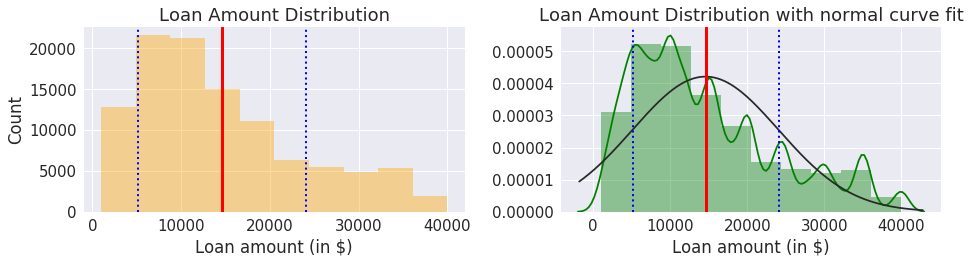

In [6]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
f,axes = plt.subplots(1,2,figsize=(14,4))
ax1 = sns.distplot(df_loanstats_2017_q2['funded_amnt'].dropna(), color='orange', 
                  kde=False,bins=10,ax=axes[0])
funded_amt_mean = df_loanstats_2017_q2['funded_amnt'].mean()
funded_amt_std = df_loanstats_2017_q2['funded_amnt'].std()
ax1.axvline(funded_amt_mean,lw=3,color='r')
ax1.axvline(funded_amt_mean + funded_amt_std, color='b',lw=2,linestyle='dotted')
ax1.axvline(funded_amt_mean - funded_amt_std, color='b',lw=2, linestyle='dotted')
ax1.set_xlabel('Loan amount (in $)')
ax1.set_ylabel('Count')
ax1.set_title('Loan Amount Distribution')
ax1 = sns.distplot(df_loanstats_2017_q2['funded_amnt'].dropna(), color='green', 
                  kde=True,fit=stats.norm,bins=10,ax=axes[1])
funded_amt_mean = df_loanstats_2017_q2['funded_amnt'].mean()
funded_amt_std = df_loanstats_2017_q2['funded_amnt'].std()
ax1.axvline(funded_amt_mean,lw=3,color='r')
ax1.axvline(funded_amt_mean + funded_amt_std, color='b',lw=2,linestyle='dotted')
ax1.axvline(funded_amt_mean - funded_amt_std, color='b',lw=2, linestyle='dotted')
ax1.set_xlabel('Loan amount (in $)')
ax1.set_title('Loan Amount Distribution with normal curve fit')
plt.tight_layout()
print('Mean: {}, Standard Deviation : {}'.format(int(funded_amt_mean),int(funded_amt_std)))

What we are seeing is that most of the borrowers are applying for the loan between \$5,000 and \$20,000. The mean loan amount is around \$15,000. There maximum loan which Lending Club gives is \$40,000 as there is no loan beyond \$40,000.

# Analytical Question

## #1: What are the different purposes LendingClub provides loans to its customers? and which loan type yields high-interest rate?

In [7]:
# Create a new DataFrame based on our above question
columns = ['loan_amnt','int_rate','title','grade']
df_loan_interest_rate = df_loanstats_2017_q2[columns]
# Need to remove % sign from the int_rate column and convert to float64 for the numeric calculation
df_loan_interest_rate['int_rate'] = df_loan_interest_rate['int_rate'].apply(lambda irate:str(irate).split('%')[0]).astype('float64')
# verify the formatted dataframe
df_loan_interest_rate.head()

,loan_amnt,int_rate,title,grade
0,7500.0,7.35,Debt consolidation,A
1,6000.0,7.35,Debt consolidation,A
2,4000.0,5.32,Home improvement,A
3,3000.0,16.02,Major purchase,C
4,20000.0,10.91,Debt consolidation,B


The formatted DataFrame looks fine now. 'int_rate' column doesn't have '%' sign anymore so, that we can apply numerical calculation on the column. Let's find out what are types of loan grade exists, and what's their corresponding interest rate.

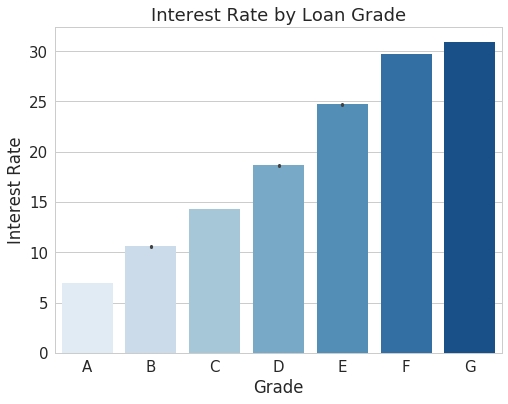

In [8]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
#sorting the index of 'grade' to display interest rate from low to high
grade_types = df_loan_interest_rate['grade'].value_counts().sort_index().index
ax = sns.barplot(data=df_loan_interest_rate,x='grade',y='int_rate',palette='Blues',order=grade_types)
ax.set_xlabel('Grade')
ax.set_ylabel('Interest Rate')
ax.set_title('Interest Rate by Loan Grade')
plt.show()

It looks like there are total 7 loan grades types exists. The lowest grade 'A' incurs lower interest rate which is < 10%,  whereas loan grade 'F'&'G' incurs highest which is around 30%. Let's find out what are the different types of loan customers are applying for? 

[]

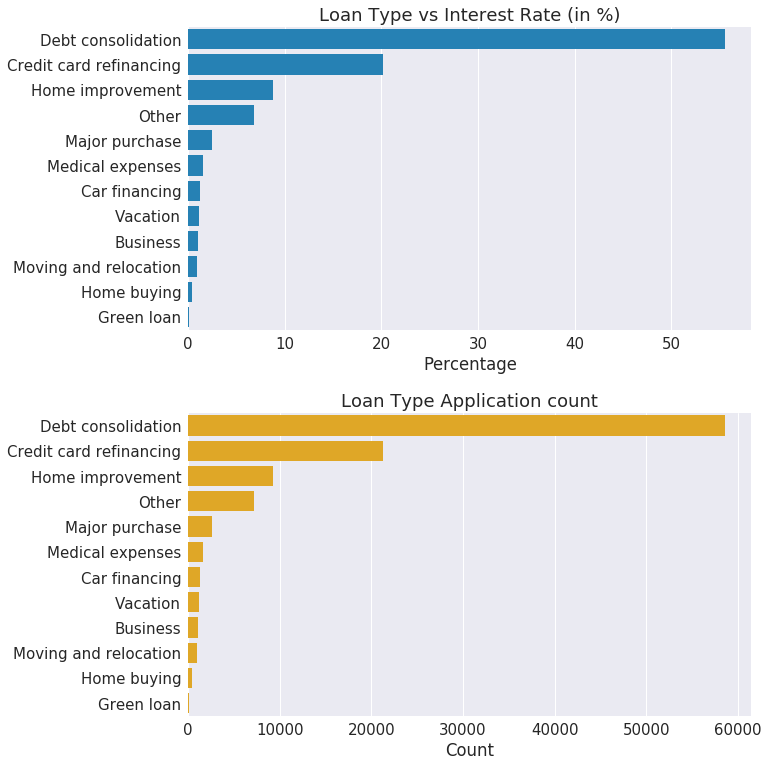

In [9]:
#Creating a new DataFrame for types of loan purposes with their count and %
loan_purpose_data = {'Count':df_loan_interest_rate['title'].value_counts().values,
        'Percentage':df_loan_interest_rate['title'].value_counts(normalize=True)}
df_purpose = pd.DataFrame(loan_purpose_data)
df_purpose['Percentage'] = df_purpose['Percentage'].apply(lambda val:(val*100))

sns.set(font_scale=1.5)
_,axis = plt.subplots(2,1,figsize=(11,11))
ax1 = sns.barplot(data=df_purpose,y=df_purpose.index,x='Percentage',color='#0e87cc',ax=axis[0])
ax1.set_title('Loan Type vs Interest Rate (in %)')

ax2 = sns.barplot(data=df_purpose,y=df_purpose.index,x='Count',color='#feb308',ax=axis[1])
ax2.set_title('Loan Type Application count')
plt.tight_layout()
plt.plot()

More than 50% of the loans are Debt Consolidation which is always a good strategy to manage personal finance because instead of paying multiple loans with the higher rate of interest, loans can be consolidated to a single loan, which helps to reduce the overall interest rate of multiple loan debts. The second highest category is Credit Card which is 20% - and is a similar kind of strategy as debt consolidation to pay off the credit card debt by taking loans.

As we found Debt Consolidation is the highest % of loan applications overall, however, are the borrowers of Debt Consolidation paying higher interest rate than other types of loans such as credit card, home improvement, car etc..?

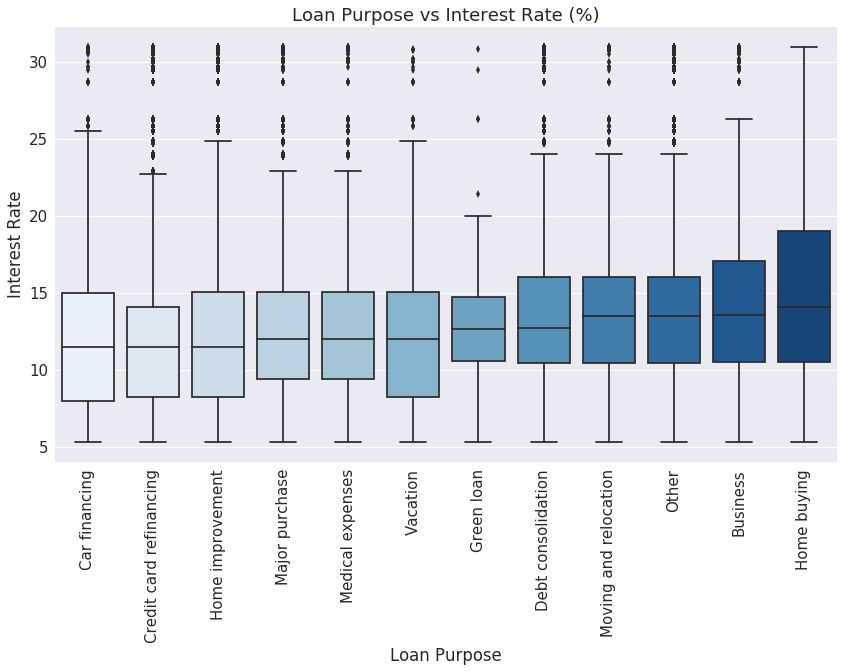

In [11]:
plt.figure(figsize=(14,8))
#Ordering the loan purpose
order = df_loan_interest_rate.groupby('title')['int_rate'].median().sort_values().index
ax = sns.boxplot(data=df_loan_interest_rate,x='title',y='int_rate',palette='Blues',order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Interest Rate')
ax.set_title('Loan Purpose vs Interest Rate (%)')
plt.show()

Though, Debt Consolidation loan is highest among all loan types the interest rate is not high. LendingClub offers 11 different types of loan excluding 'other' type. The Minimum interest rate is same across all loan types which is just above 5%, the median interest rate is between 10% to 15%. Across all the loan applications, Home buying has highest median interest and a max interest of more than 30%.

## #2: What is the reason behind loan application denial or rejection of the loan?

There are only a few columns present in the Rejection dataset compare to Approved. It seems the columns in the Rejection data set is not matching with the Approved set. Let's make sure both the Dataset has the same column names before we proceed with analysis.

In [12]:
df_rejectedstats_2017_q2_valid = df_rejectedstats_2017_q2.dropna()
#Rename columns with the same as Approved data set
df_rejectedstats_2017_q2_valid.rename_axis({'Loan Title':'title',
                                            'Debt-To-Income Ratio':'dti',
                                            'Employment Length':'emp_length',
                                            'Amount Requested':'funded_amnt'}
                                           ,axis=1,inplace=True)
# There are title with underscore and without underscore so, lets replace the duplicate ones 
df_rejectedstats_2017_q2_valid.replace({'debt_consolidation':'Debt consolidation',
                                       'home_improvement':'Home improvement',
                                       'major_purchase':'Major purchase',
                                       'vacation':'Vacation',
                                       'renewable_energy':'Green loan',
                                       'moving':'Moving and relocation',
                                       'small_business':'Business',
                                       'credit_card':'Credit card refinancing',
                                       'house':'Home improvement',
                                       'medical':'Medical expenses',
                                       'car':'car financing','car financing':'Car financing',
                                       'other':'Other'},inplace=True)
#lets remove % from 'dti (debt to income ratio) column' 
df_rejectedstats_2017_q2_valid['dti'] = df_rejectedstats_2017_q2_valid['dti'].apply(lambda val:str(val).split('%')[0]).astype('float64')
#Drop the columns which is not going to be used for the analysis
df_rejectedstats_2017_q2_valid.drop(['Application Date','Policy Code','State','Zip Code'],axis=1,inplace=True)
df_rejectedstats_2017_q2_valid.head()

,funded_amnt,title,Risk_Score,dti,emp_length
0,13650.0,Debt consolidation,799.0,19.98,< 1 year
9,14000.0,Car financing,551.0,25.60,< 1 year
12,10000.0,Credit card refinancing,643.0,49.23,< 1 year
13,40000.0,Credit card refinancing,918.0,32.14,< 1 year
14,20000.0,Green loan,650.0,13.94,n/a


Above DataFrame (df_rejectedstats_2017_q2_valid) looks good now where the columns get renamed, formatted and dropped appropriately. Now create another DataFrame for Approved loans with the corresponding columns so that we can use for analysis. 

In [13]:
columns = ['funded_amnt','title','dti','emp_length','fico_range_low','fico_range_high']
df_approvedstats_2017_q2_valid = df_loanstats_2017_q2[columns].dropna()
#Add a new column for average fico score as 'Risk_Score' to compare with rejected loans data set on same column
df_approvedstats_2017_q2_valid['Risk_Score'] = (df_approvedstats_2017_q2_valid['fico_range_low']+ df_approvedstats_2017_q2_valid['fico_range_high'])/2
df_approvedstats_2017_q2_valid.head()

,funded_amnt,title,dti,emp_length,fico_range_low,fico_range_high,Risk_Score
0,7500.0,Debt consolidation,21.43,10+ years,735.0,739.0,737.0
1,6000.0,Debt consolidation,19.02,2 years,735.0,739.0,737.0
2,4000.0,Home improvement,8.71,9 years,790.0,794.0,792.0
3,3000.0,Major purchase,17.79,9 years,670.0,674.0,672.0
4,20000.0,Debt consolidation,20.82,n/a,775.0,779.0,777.0


Above approved DataFrame (df_approvedstats_2017_q2_valid) looks good now. Let's verify both the Dataset size before proceeding with the comparison for the loan rejection.

In [14]:
print('# of records in reject data set - {} '.format(len(df_rejectedstats_2017_q2_valid)))
print('# of records in approved data set - {}'.format(len(df_approvedstats_2017_q2_valid)))

# of records in reject data set - 176561 
# of records in approved data set - 105376


The number of records in both the Data Set seems imbalanced. Let's consider taking 50,000 random sample from both the Approved and Rejected DataFrame for further analysis.

In [15]:
#setting the random_state so that every run we will get same records
df_rejectedstats_2017_q2_sample = df_rejectedstats_2017_q2_valid.sample(50000)
df_approvedstats_2017_q2_sample = df_approvedstats_2017_q2_valid.sample(50000)

print('# of records in reject data set - {} '.format(len(df_rejectedstats_2017_q2_sample)))
print('# of records in approved data set - {}'.format(len(df_approvedstats_2017_q2_sample)))

# of records in reject data set - 50000 
# of records in approved data set - 50000


That looks much better now. We had taken 50,000 records as the sample, now lets dive into the analysis of 3 major components (as below) which is common between Approved and Rejected loans and verify if there is any on these two sets?

**dti** - Debt to Income Ratio (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income)

**Risk_Score** - Borrower's Fico Score Range

**emp_length** - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

Let's verify if there is any difference between average 'Debt To Income'? 

In [16]:
df_approvedstats_2017_q2_sample['Status'] = 'Approved' # Adding new columns as 'Approved'
df_rejectedstats_2017_q2_sample['Status'] = 'Rejected' # Adding new columns as 'Rejected'
# Creating a new DataFrame for 'dti' and 'Risk_Score' comparision
df_aprved_sample_filter = df_approvedstats_2017_q2_sample[['dti','Risk_Score','Status']] 
df_app_rej_compare = df_aprved_sample_filter.append(df_rejectedstats_2017_q2_sample[['dti','Risk_Score','Status']])

Text(0.5,1,'Debt to Income Ratio vs Loan Status')

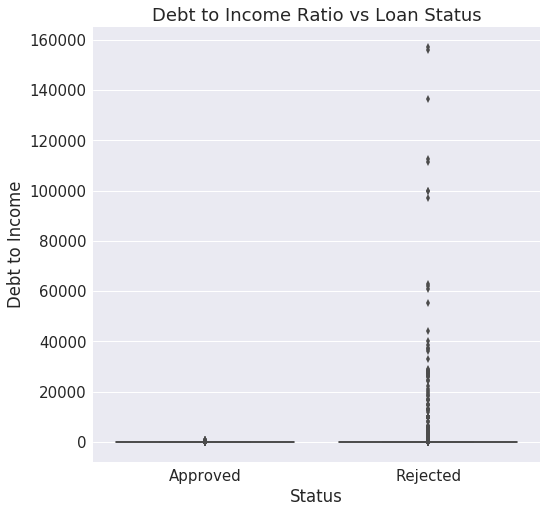

In [17]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df_app_rej_compare,x='Status',y='dti')
ax.set_ylabel('Debt to Income')
ax.set_title('Debt to Income Ratio vs Loan Status')

It looks like there are lot of outliers in the Rejected Status which is skewing the overall dti ratio. Lets take the 'dti' up to 99.99% for both Approved and Rejected loans to verify how they are differing.

Approved loan dti mean : 18.98
Rejected loan dti mean : 102.87


Text(0.5,1,'Debt to Income Ratio vs Loan Status')

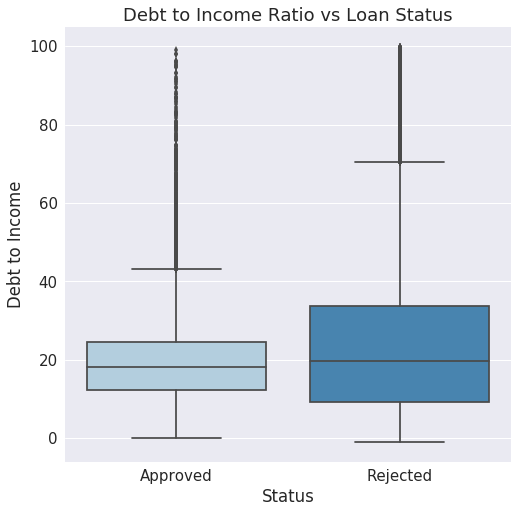

In [18]:
approved_status_sample_dti_mean = df_app_rej_compare[df_app_rej_compare['Status']=='Approved']['dti'].mean()
rejected_status_sample_dti_mean = df_app_rej_compare[df_app_rej_compare['Status']=='Rejected']['dti'].mean()
print('Approved loan dti mean : {:4.2f}'.format(approved_status_sample_dti_mean))
print('Rejected loan dti mean : {:4.2f}'.format(rejected_status_sample_dti_mean))

df_approvedstats_2017_q2_sample = df_approvedstats_2017_q2_sample[df_approvedstats_2017_q2_sample['dti'] < 99.99]
df_rejectedstats_2017_q2_sample = df_rejectedstats_2017_q2_sample[df_rejectedstats_2017_q2_sample['dti'] < 99.99]

df_app_rej_compare = df_app_rej_compare[df_app_rej_compare['dti'] < 99.99]
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df_app_rej_compare,x='Status',y='dti',palette='Blues')
ax.set_ylabel('Debt to Income')
ax.set_title('Debt to Income Ratio vs Loan Status')

After removing the higher outlier from Rejected Loans, what we are seeing is the average 'dti' of both Approved vs Rejected loans is differing between 3% to 4%. However, most of the loans are getting rejected because of higher 'dti' ratio. This is a correct evaluation from LendingClub to not provide loans to those borrower who has high 'Debt-To-Income' ratio where the chances of getting default is very high.

Next, let's verify for Risk_Score impact Application approval or not?

Approved loan Risk Score mean : 699
Rejected loan Risk Score mean : 633


Text(0.5,1,'Risk Score')

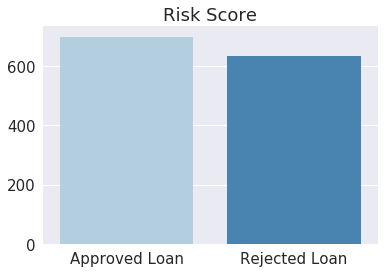

In [19]:
approved_status_risk_score_mean = df_approvedstats_2017_q2_sample['Risk_Score'].mean()
rejected_status_risk_score_mean = df_rejectedstats_2017_q2_sample['Risk_Score'].mean()
print('Approved loan Risk Score mean : {}'.format(int(approved_status_risk_score_mean)))
print('Rejected loan Risk Score mean : {}'.format(int(rejected_status_risk_score_mean)))
df_risk_score = pd.DataFrame({'Approved Loan':approved_status_risk_score_mean,
                                 'Rejected Loan': rejected_status_risk_score_mean},index=[0,1])
ax = sns.barplot(data=df_risk_score,palette='Blues')
ax.set_title('Risk Score')

There is more than 50 point difference on average between an approved loan vs a rejected. 50 point in credit score is significant, also we are seeing, the sample data is rejected loan score is below 640.

Next, Let's verify the final data point which is 'Employment Lengh' between approved and rejected loans. Does the number of years make an impact to get an approved loan? Let's find out next.

In [20]:
df_rejectedstats_2017_q2_sample['emp_length'].value_counts(normalize=True)

< 1 year     0.893207
5 years      0.030199
n/a          0.023122
10+ years    0.022090
2 years      0.006474
3 years      0.006152
1 year       0.005506
4 years      0.003764
6 years      0.002710
7 years      0.002560
8 years      0.002194
9 years      0.002022
Name: emp_length, dtype: float64

Text(0.5,1,'Loan rejection by length of employment')

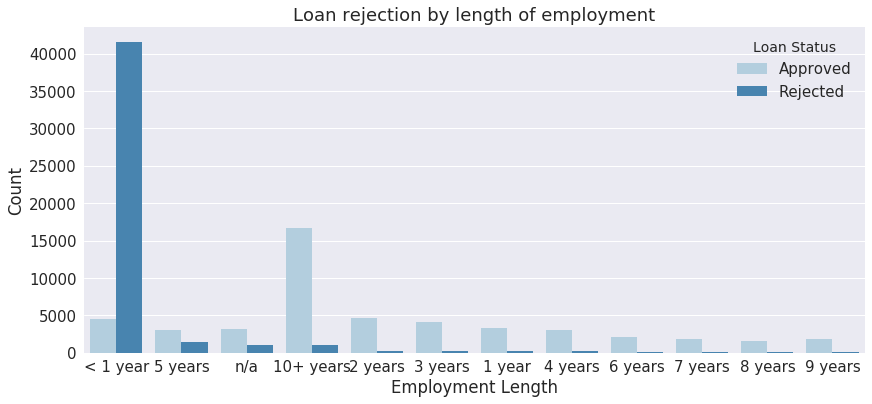

In [21]:
# Adding an additional column as 'Approved' on the approved data set for side by side comparision
df_approvedstats_2017_q2_sample['Loan Status'] = 'Approved'
# Adding an additional column as 'Rejected on the rejected data set for side by side comparision
df_rejectedstats_2017_q2_sample['Loan Status'] = 'Rejected'
# Create a new DF by concating both approved and reject data set
df_combined_app_rej = pd.concat([df_approvedstats_2017_q2_sample,df_rejectedstats_2017_q2_sample])
order = df_rejectedstats_2017_q2_sample['emp_length'].value_counts().index
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df_combined_app_rej, x='emp_length',hue='Loan Status',order=order,palette='Blues')
ax.set_xlabel('Employment Length')
ax.set_ylabel('Count')
ax.set_title('Loan rejection by length of employment')

More than 90% of applications getting rejected based on employment length which is < 1 year. What we understood that LendingClub is considering the length of employment as major criteria to approve the loan. The approval rate is much higher is employment length is >10 years.

Our final conclusion on the Loan rejection is - All three factors such as Debt to Income, Employment Length, and Credit Score plays a critical role successful loan approval by LendingClub.

# #3. How is Lending Club's overall performance in 2017 Q2 ?


To figure out overall financial health/performance of LendingClub in 2017 Q2, we are going to focus on the below perspectives: 
    1. What's the total loan amount vs recovered amount so far?
    2. What's the Default or Charged Off amount and percentage (which LD loss) out of total loaned amount? 
       Note: We are not considering the late payments here, because those are not the loss for LD, because borrowers paid the amount, though lately.
    3. What's the Fully Paid loan amount and percentage out of total loaned amount?
       Note: Fully paid loan amount are those customers paid back the amount ahead of their due date, which in turn saves money on the interest in long-term.
    4. What % of loan has been defaulted or charged off comparing to overall issued loans?
       Note: This is the amount got into the loss which can't be recovered.
       
Let's start by creating a new DataFrame suitable to our need.

In [22]:
#Common method for interest rate split
def int_r_splitter(int_r_str):
    return np.float64(int_r_str.split('%')[0])

In [23]:
columns = ['issue_d','loan_status','grade','funded_amnt','total_pymnt','int_rate',
           'out_prncp','total_rec_prncp','total_rec_int','addr_state']
df_fin_info_q2 = df_loanstats_2017_q2[columns]
#remove the % from int_rate
df_fin_info_q2['int_rate'] = df_fin_info_q2['int_rate'].apply(lambda x:int_r_splitter(str(x)))
# Add a new column as 'Fully Paid Amount' to calculate amount for the Fully Paid loans
df_fin_info_q2['Fully Paid Amount'] = df_fin_info_q2[df_fin_info_q2['loan_status']=='Fully Paid']['total_pymnt']
df_fin_info_q2['Fully Paid Amount'].fillna(value=0,inplace=True)
print('Total rrecods: ',df_fin_info_q2.size)
df_fin_info_q2.head()

Total rrecods:  1159983


,issue_d,loan_status,grade,funded_amnt,total_pymnt,int_rate,out_prncp,total_rec_prncp,total_rec_int,addr_state,Fully Paid Amount
0,Jun-2017,Current,A,7500.0,457.92,7.35,7125.15,374.85,83.07,MD,0.0
1,Jun-2017,Current,A,6000.0,366.34,7.35,5700.12,299.88,66.46,IN,0.0
2,Jun-2017,Current,A,4000.0,237.96,5.32,3794.09,205.91,32.05,MI,0.0
3,Jun-2017,Current,C,3000.0,204.34,16.02,2868.21,131.79,72.55,MT,0.0
4,Jun-2017,Current,B,20000.0,1277.55,10.91,19051.51,948.49,329.06,IL,0.0


As the Dataframe is created, now let's find out the below details in 2017 Q2 month-wise.

    1. Total funded amount.
    2. Total remaining principal amount which borrower need to pay.
    3. The Total amount collected towards principal from the installment.
    4. The Total amount collected towards interest from the installment.

In [24]:
df_fin_info_q2[df_fin_info_q2['loan_status']=='Fully Paid'].head(5)

,issue_d,loan_status,grade,funded_amnt,total_pymnt,int_rate,out_prncp,total_rec_prncp,total_rec_int,addr_state,Fully Paid Amount
19,Jun-2017,Fully Paid,A,11575.0,11707.816236,7.35,0.0,11575.0,132.82,CA,11707.816236
22,Jun-2017,Fully Paid,E,7200.0,7206.461000,24.85,0.0,7200.0,6.46,WA,7206.461000
260,Jun-2017,Fully Paid,B,40000.0,40013.640000,9.44,0.0,40000.0,13.64,TX,40013.640000
265,Jun-2017,Fully Paid,C,10000.0,10026.700000,16.02,0.0,10000.0,26.70,CA,10026.700000
313,Jun-2017,Fully Paid,C,14000.0,14375.136851,16.02,0.0,14000.0,375.14,MA,14375.136851


In [25]:
df_q2_summary = df_fin_info_q2.groupby('issue_d')[['funded_amnt','out_prncp',
                                                   'total_rec_prncp','total_rec_int','Fully Paid Amount']].agg('sum')
#Renaming the columns for better readability
df_q2_summary.rename_axis({'funded_amnt':'Total Funded Amount',
                          'out_prncp':'Remaining outstanding principal',
                          'total_rec_prncp':'Principal received to date',
                          'total_rec_int':'Interest received to date'},axis=1,inplace=True)
df_q2_summary.head()

,Total Funded Amount,Remaining outstanding principal,Principal received to date,Interest received to date,Fully Paid Amount
issue_d,,,,,
Apr-2017,437930725.0,3.715637e+08,6.551996e+07,22119222.54,2.642672e+07
Jun-2017,550982575.0,5.025486e+08,4.834575e+07,16476681.87,1.842519e+07
May-2017,549518775.0,4.842687e+08,6.510519e+07,22495743.46,2.540981e+07


In [26]:
total_funded_amount_q2 = 0
remaining_outsnd_bal_q2 = 0
prin_rcvd_to_dt_q2 = 0
int_rcvd_to_dt_q2 = 0
fully_paid_amt_q2 = 0
for i in df_q2_summary.index:
    total_funded_amount_q2 += df_q2_summary.loc[i]['Total Funded Amount']
    remaining_outsnd_bal_q2 += df_q2_summary.loc[i]['Remaining outstanding principal']
    prin_rcvd_to_dt_q2 += df_q2_summary.loc[i]['Principal received to date']
    int_rcvd_to_dt_q2 += df_q2_summary.loc[i]['Interest received to date']
    fully_paid_amt_q2 += df_q2_summary.loc[i]['Fully Paid Amount']
    
print('Total Funded Amount in 2017 Q2 , ${:.0f}'.format(total_funded_amount_q2))
print('Remaining outstanding principal in 2017 Q2 , ${:.0f}'.format(remaining_outsnd_bal_q2))
print('Principal received to date in 2017 Q2 , ${:.0f}'.format(prin_rcvd_to_dt_q2))
print('Interest received to date in 2017 Q2 , ${:.0f}'.format(int_rcvd_to_dt_q2))
print('Amount collected towards Fully Paid Amount in 2017 Q2 , ${:.0f}'.format(fully_paid_amt_q2))

print('\n')

'''
    The remaining amount % which needs to be collected is :
        ((Remaining Outstanding Principal - Amount Fully Paid) / Total Funded Loan Amount) * 100
'''
remin_amt_perc = ((remaining_outsnd_bal_q2-fully_paid_amt_q2)/total_funded_amount_q2) * 100
print('{:.0f}% Total funded amount of 2017 Q2 is yet to be collected.'.format(remin_amt_perc))

Total Funded Amount in 2017 Q2 , $1538432075
Remaining outstanding principal in 2017 Q2 , $1358380950
Principal received to date in 2017 Q2 , $178970901
Interest received to date in 2017 Q2 , $61091648
Amount collected towards Fully Paid Amount in 2017 Q2 , $70261727


84% Total funded amount of 2017 Q2 is yet to be collected.


What we are seeing is that in 2017 Q2, LendingClub approved and given the loan amount of \$1.5 billion dollars, out of which \$1.35 billion dollars is yet to be collected from borrower.

Let's visualize the details.

In [27]:
df_q2_summary.head()

,Total Funded Amount,Remaining outstanding principal,Principal received to date,Interest received to date,Fully Paid Amount
issue_d,,,,,
Apr-2017,437930725.0,3.715637e+08,6.551996e+07,22119222.54,2.642672e+07
Jun-2017,550982575.0,5.025486e+08,4.834575e+07,16476681.87,1.842519e+07
May-2017,549518775.0,4.842687e+08,6.510519e+07,22495743.46,2.540981e+07


[Text(0,0.5,'Amount (in 100 million)'), Text(0.5,0,'')]

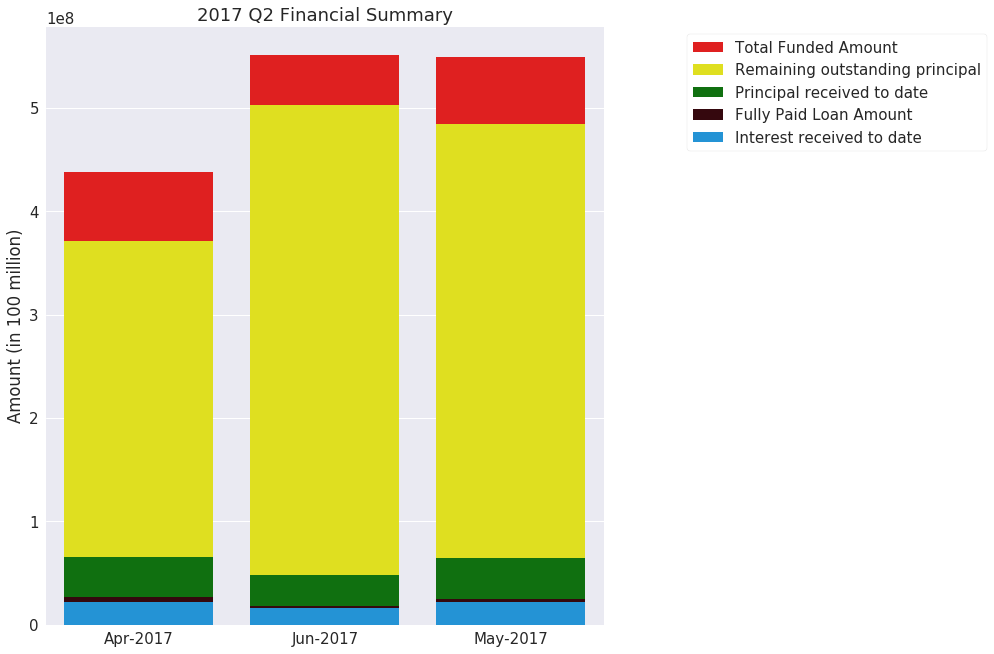

In [28]:
_, ax = plt.subplots(figsize=(10,11))
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,y='Total Funded Amount',
                    label='Total Funded Amount',color='red')
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,
                y='Remaining outstanding principal',label='Remaining outstanding principal',color='yellow')
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,
                y='Principal received to date',label='Principal received to date',color='green')
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,
                y='Fully Paid Amount', label = 'Fully Paid Loan Amount', color='#3c0008')
sns.barplot(data=df_q2_summary,x=df_q2_summary.index,
                y='Interest received to date',label='Interest received to date',color='#069af3')

ax.legend(loc='upper right',frameon=True,bbox_to_anchor=(1.7,1))
ax.set_title('2017 Q2 Financial Summary')
sns.despine()
ax.set(xlabel='',ylabel='Amount (in 100 million)')

The 2017 Q2 majority of the loan amount given yet is yet to be collected for Lending Club, which is 84% of total amount. Out of 1.5 Billion, the fully paid loan amount is 70 Million.

In [30]:
print('Total Notes of different grades (A through G) issued in 2017 Q2 -')
ser_grd_index = df_fin_info_q2['grade'].value_counts().sort_index()
ser_grd_index

Total Notes of different grades (A through G) issued in 2017 Q2 -


A    17898
B    31301
C    36880
D    12015
E     4847
F     1725
G      785
Name: grade, dtype: int64

Text(0.5,1,'Loan Grade distribution in 2017 Q2')

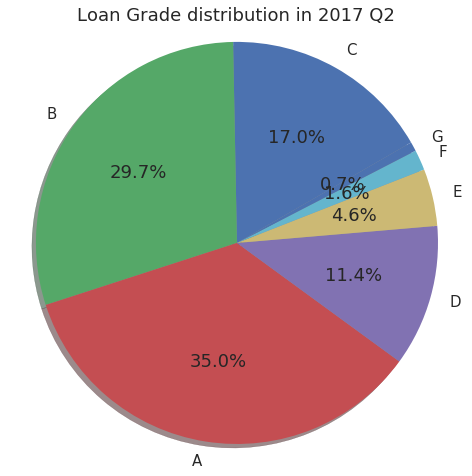

In [31]:
plt.figure(figsize=(8,8))
plt.pie(ser_grd_index,startangle=30,shadow=True,
            labels=df_fin_info_q2['grade'].value_counts().index,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Loan Grade distribution in 2017 Q2')

LD issuing more numbers grade A, B & C which is more than 80% compare to others grades such as D, E, F, G. Let's find out how individually grades are distributed across months in 2017 Q2.

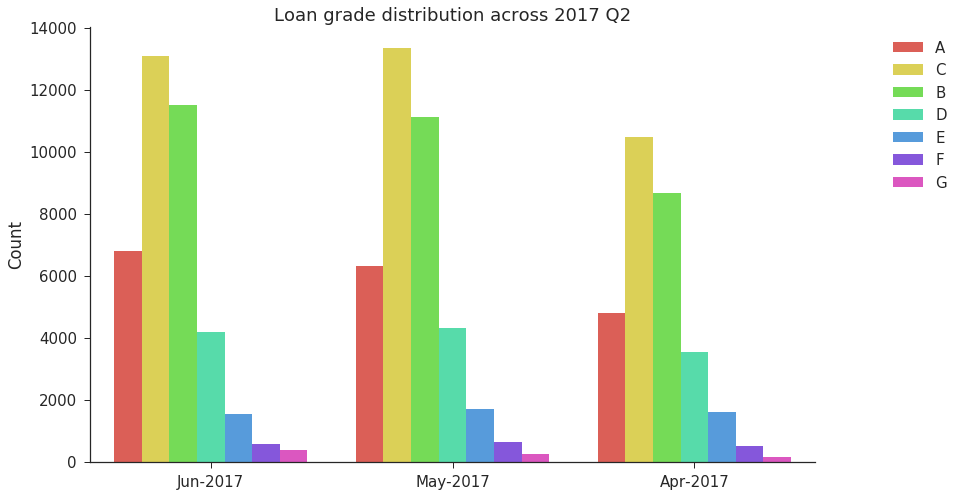

In [32]:
_,ax = plt.subplots(figsize=(13,8))
sns.countplot(data=df_fin_info_q2,x='issue_d',hue='grade',palette='hls',saturation=1)
sns.despine()
ax.set(xlabel='',ylabel='Count')
ax.set_title('Loan grade distribution across 2017 Q2')
ax.legend(loc='upper right',bbox_to_anchor=(1.2,1))

It looks like the loan grades which is A thru G is being distributed equally in all 3 quarters. The majority of the notes/grades on the loan is grade B & C. Grade B & C return and risk is mediocre. The loan grade F & G is very less as this is higher interest rate and given to the low credit score borrowers which involve risk of default or charged off.

Finally, lets conclude the # of Default and Charged off loans in 2017 Q2 out of total issued loans.

In [34]:
total_lon_cnt = len(df_fin_info_q2)
def_chgoff_ln_count = len(df_fin_info_q2[df_fin_info_q2['loan_status'].isin(['Default','Charged Off'])])
                                     
print('Total issued loans : {}'.format(total_lon_cnt))
print('Total Charged Off & Default loan count : {}'.format(def_chgoff_ln_count))
default_ln_perc = (def_chgoff_ln_count/total_lon_cnt)*100

print('Loan Charged Off or Default % of Total issued loans : {:4.2f}'.format(default_ln_perc))
df_fin_info_q2['loan_status'].value_counts()

Total issued loans : 105453
Total Charged Off & Default loan count : 74
Loan Charged Off or Default % of Total issued loans : 0.07


Current               97544
Fully Paid             5075
In Grace Period        1534
Late (31-120 days)      805
Late (16-30 days)       419
Charged Off              73
Default                   1
Name: loan_status, dtype: int64

What we are seeing is that only a tiny loan issues population is defaulted or waived off their loans in 2017 Q2, which is 0.07% and the rest of the issued loan (99.93%) is on-track where LD is getting monthly installment amount based on precalculated interest.

After the above analysis, we found out that the overall performance in 2017 Q2 is standing good.

# Future Research

# References

Data Set has been taken from - https://www.lendingclub.com/info/download-data.action

About Lending Club Description is referred from [Lending Club Wiki Site](https://en.wikipedia.org/wiki/Lending_Club)